In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas
import plotly.graph_objs as go
import plotly.offline as py
from statsmodels.tsa.vector_ar.vecm import *

# VAR

In [2]:
df = pd.read_excel('SORA.xlsx')
df.reset_index(drop=True, inplace=True)

In [3]:
df_train = df.iloc[:]
df = df_train

In [4]:
df_train = df_train.rename(columns={'SORA': 'y', 'SORA Publication Date':'ds'})
df_train['y_orig'] = df_train['y']
df_train['y'] = np.log(df_train['y'])

model_new = Prophet()
model_new.add_regressor('EFFR')

In [5]:
model_new.fit(df_train)

future_data = model_new.make_future_dataframe(periods=293, freq = 'D')

20:24:25 - cmdstanpy - INFO - Chain [1] start processing
20:24:26 - cmdstanpy - INFO - Chain [1] done processing


In [6]:

df = df.rename(columns={'SORA': 'y', 'SORA Publication Date':'ds'})
future_data=df[['ds', 'EFFR']]

In [7]:
future_data

,ds,EFFR
0,2005-07-04,3.360
1,2005-07-05,3.270
2,2005-07-06,2.990
3,2005-07-07,3.180
4,2005-07-08,3.220
...,...,...
4828,2025-12-18,3.332
4829,2025-12-21,3.332
4830,2025-12-24,3.332
4831,2025-12-27,3.332


In [8]:
forecast_data = model_new.predict(future_data)

forecast_data[['yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,yhat,yhat_lower,yhat_upper
4828,0.183783,-0.850059,1.229429
4829,1.153198,0.254706,2.220442
4830,0.210916,-0.779343,1.241328
4831,1.147793,0.193938,2.195241
4832,0.232098,-0.759296,1.264359


In [9]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,EFFR,EFFR_lower,EFFR_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-04,-0.739240,-0.423108,1.160818,-0.739240,-0.739240,1.439621,1.439621,1.439621,1.087499,...,-0.209407,-0.209407,-0.209407,-0.142714,-0.142714,-0.142714,0.0,0.0,0.0,0.348259
1,2005-07-05,-0.740389,-0.535133,1.021439,-0.740389,-0.740389,1.373982,1.373982,1.373982,0.999490,...,-0.237912,-0.237912,-0.237912,-0.136580,-0.136580,-0.136580,0.0,0.0,0.0,0.259101
2,2005-07-06,-0.741538,-0.780264,0.879707,-0.741538,-0.741538,1.169771,1.169771,1.169771,0.764174,...,-0.274993,-0.274993,-0.274993,-0.130604,-0.130604,-0.130604,0.0,0.0,0.0,0.022637
3,2005-07-07,-0.742687,-0.627861,0.947014,-0.742687,-0.742687,1.308342,1.308342,1.308342,0.877563,...,-0.305906,-0.305906,-0.305906,-0.124874,-0.124874,-0.124874,0.0,0.0,0.0,0.134876
4,2005-07-08,-0.743836,-0.641999,0.991547,-0.743836,-0.743836,1.337515,1.337515,1.337515,0.914058,...,-0.303990,-0.303990,-0.303990,-0.119467,-0.119467,-0.119467,0.0,0.0,0.0,0.170222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,2025-12-18,-0.975147,-0.850059,1.229429,-1.486370,-0.392995,1.419200,1.419200,1.419200,1.158930,...,-0.305906,-0.305906,-0.305906,0.045636,0.045636,0.045636,0.0,0.0,0.0,0.183783
4829,2025-12-21,-0.976056,0.254706,2.220442,-1.491185,-0.388254,1.419200,1.419200,1.419200,2.129255,...,0.666104,0.666104,0.666104,0.043951,0.043951,0.043951,0.0,0.0,0.0,1.153198
4830,2025-12-24,-0.976966,-0.779343,1.241328,-1.496000,-0.383514,1.419200,1.419200,1.419200,1.187882,...,-0.274993,-0.274993,-0.274993,0.043676,0.043676,0.043676,0.0,0.0,0.0,0.210916
4831,2025-12-27,-0.977875,0.193938,2.195241,-1.500815,-0.380394,1.419200,1.419200,1.419200,2.125668,...,0.666104,0.666104,0.666104,0.040365,0.040365,0.040365,0.0,0.0,0.0,1.147793


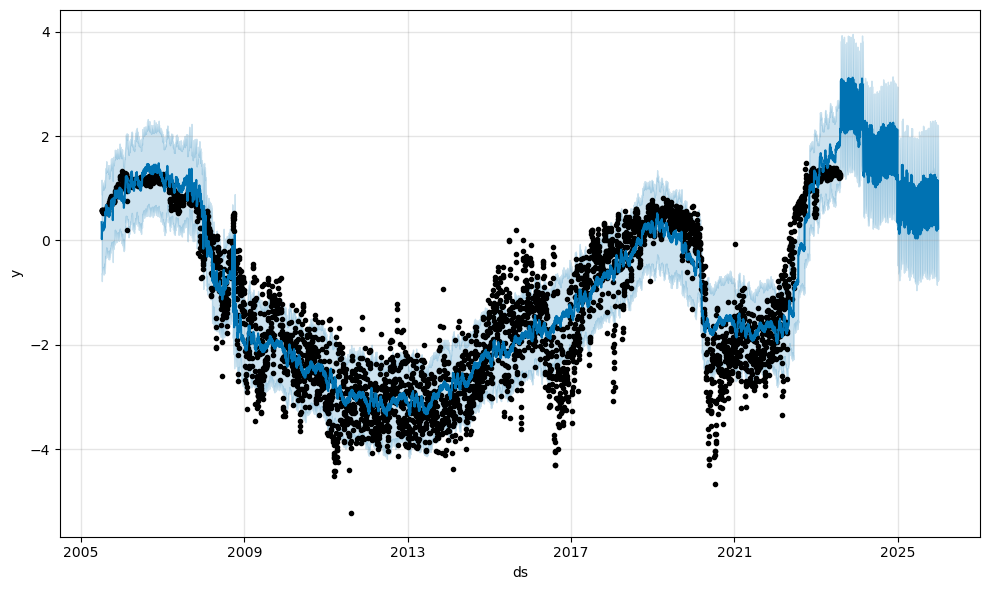

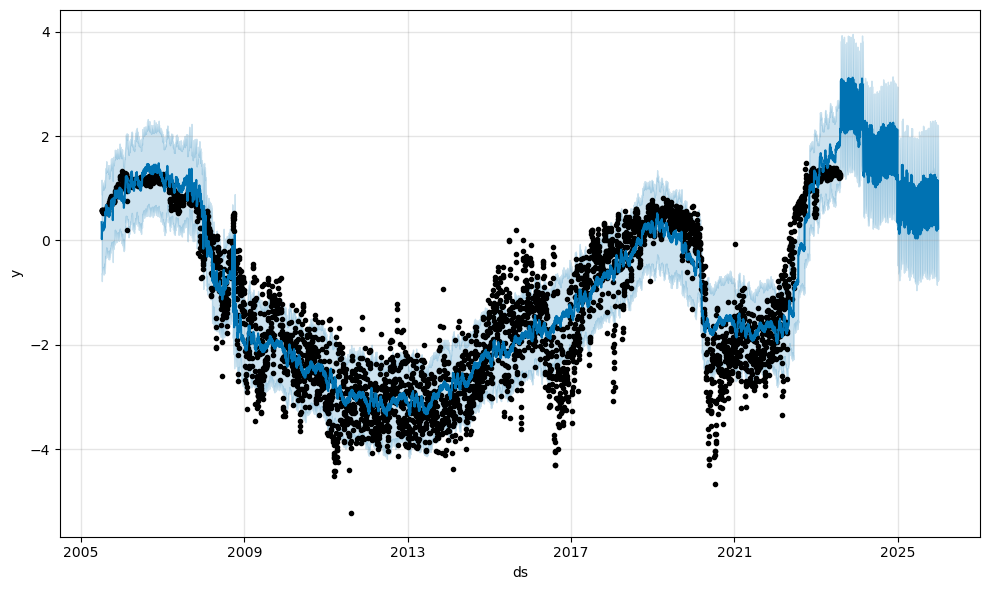

In [10]:
model_new.plot(forecast_data)

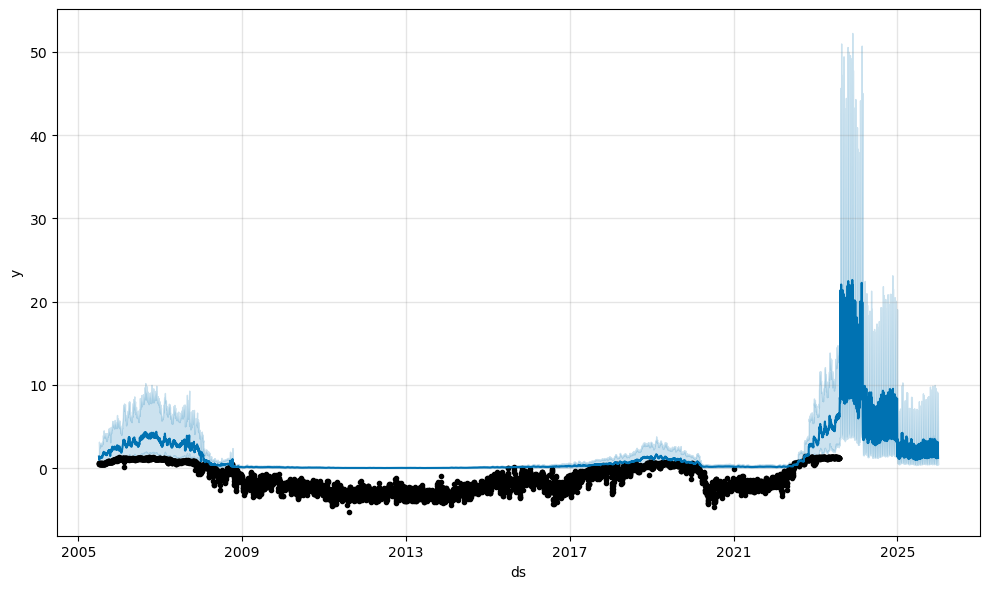

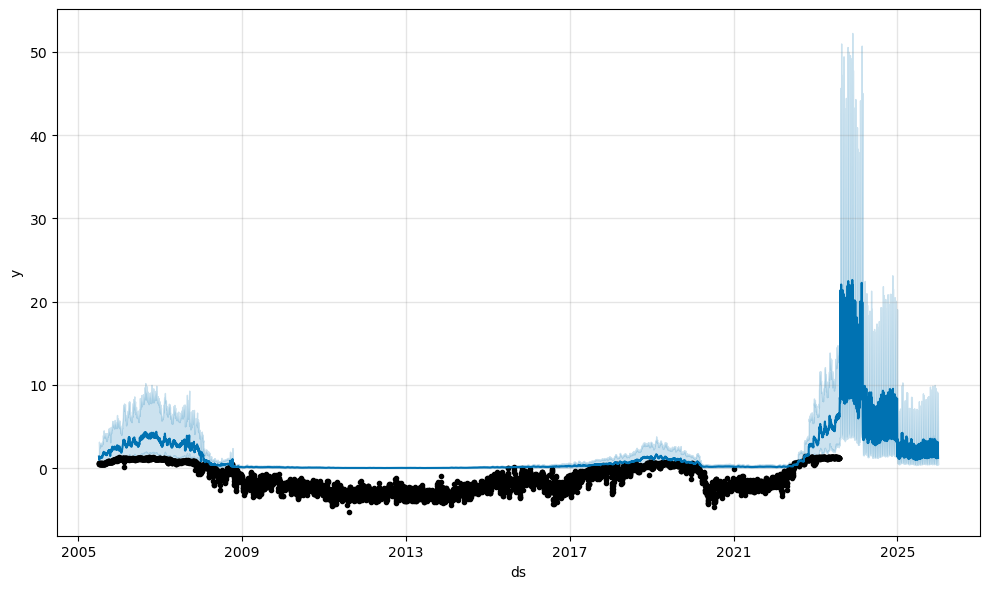

In [11]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [12]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [13]:
final_df = forecast_data

In [14]:
final_date = final_df["ds"].iloc[-293:]
final_pred = final_df["yhat"].iloc[-293:]

In [15]:
final_date = final_date.to_frame()

In [16]:
final_pred = final_pred.to_frame()

In [17]:
final_pred = final_pred['yhat'].rename('SORA')
final_pred = final_pred.to_frame()

In [18]:
var = pd.concat([final_date, final_pred], axis=1)
var.reset_index(drop=True, inplace=True)

In [19]:
var.to_excel("VAR_predictions.xlsx")

In [19]:
#VAR
final_df = pd.DataFrame(forecast_data_orig)
actual_chart = go.Scatter(x=df['ds'], y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(x=df['ds'], y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(x=df['ds'], y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(x=df['ds'], y=final_df["yhat_lower"], name= 'Predicted Lower')
effr = go.Scatter(x=df['ds'], y=df["EFFR"], name= 'EFFR')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower, effr])

'temp-plot.html'

# VECM

In [20]:
data = pd.read_excel('SORA.xlsx')
val = pd.read_excel('SORA.xlsx')
data.reset_index(drop=True, inplace=True)

In [21]:
dates = data.drop(columns=["SORA", "EFFR"])
val = val.drop(columns=["SORA Publication Date"])

In [22]:
dates = dates.squeeze()
dates = dates.astype(str)

In [23]:
from statsmodels.tsa.base.datetools import dates_from_str
date = dates_from_str(dates)

In [24]:
data = val[["SORA", "EFFR"]]
data.index = pandas.DatetimeIndex(date)
data.dropna(inplace=True)

In [25]:
lag_order = select_order(data=data, maxlags=10, deterministic="ci", seasons=4)
lag_order.summary()

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date inde

,AIC,BIC,FPE,HQIC
0,-9.246,-9.227,9.646e-05,-9.239
1,-9.260,-9.235,9.512e-05,-9.251
2,-9.289,-9.258,9.241e-05,-9.278
3,-9.334,-9.297,8.840e-05,-9.321
4,-9.338,-9.295,8.805e-05,-9.323
5,-9.338,-9.289,8.805e-05,-9.321
6,-9.342,-9.288,8.765e-05,-9.323
7,-9.357,-9.297,8.637e-05,-9.336
8,-9.364,-9.299*,8.576e-05,-9.341
9,-9.364,-9.293,8.578e-05,-9.339


In [26]:
lag_order.aic, lag_order.bic, lag_order.fpe, lag_order.hqic

(10, 8, 10, 10)

In [27]:
rank_test = select_coint_rank(data, 0, 3, method="trace", signif=0.1)
rank_test.rank

1

In [28]:
rank_test.summary()

r_0,r_1,test statistic,critical value
0,2,114.3,13.43
1,2,0.04084,2.705


In [29]:
model = VECM(data, deterministic="ci", seasons=4, k_ar_diff=lag_order.aic, coint_rank=rank_test.rank)

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [30]:
vecm_res = model.fit()
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,0.0174,0.006,3.095,0.002,0.006,0.028
season2,0.0002,0.006,0.038,0.969,-0.011,0.011
season3,0.0076,0.006,1.355,0.175,-0.003,0.019
L1.SORA,-0.0423,0.015,-2.753,0.006,-0.072,-0.012
L1.EFFR,0.0488,0.029,1.699,0.089,-0.008,0.105
L2.SORA,-0.0909,0.015,-5.907,0.000,-0.121,-0.061
L2.EFFR,0.1035,0.029,3.560,0.000,0.047,0.160
L3.SORA,-0.1397,0.015,-9.102,0.000,-0.170,-0.110
L3.EFFR,-0.0110,0.029,-0.375,0.707,-0.069,0.047
L4.SORA,-0.0679,0.015,-4.418,0.000,-0.098,-0.038


In [31]:
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=293, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[3.52371264 5.33733808]
 [3.48305076 5.34312996]
 [3.43581458 5.35169646]
 [3.40671274 5.36050265]
 [3.42943936 5.36546881]
 [3.43510086 5.36408171]
 [3.41911767 5.37248336]
 [3.38991335 5.38069171]
 [3.40020476 5.38338956]
 [3.39998621 5.38485418]
 [3.4009094  5.39134077]
 [3.38227811 5.39620715]
 [3.38007467 5.3997372 ]
 [3.36898702 5.40148134]
 [3.3692656  5.4079753 ]
 [3.35810114 5.41235569]
 [3.36211332 5.41442159]
 [3.34961653 5.41542702]
 [3.34677082 5.42213397]
 [3.33644798 5.42620587]
 [3.34408131 5.4277169 ]
 [3.33342056 5.42826049]
 [3.32933136 5.43457762]
 [3.31744733 5.43847942]
 [3.3255638  5.43972474]
 [3.31679746 5.43978864]
 [3.31386117 5.44570913]
 [3.30194023 5.44930593]
 [3.30987478 5.45026325]
 [3.30164872 5.45005014]
 [3.29972651 5.4556329 ]
 [3.28842031 5.45890472]
 [3.29642385 5.45960636]
 [3.2882678  5.45914905]
 [3.28676003 5.46447212]
 [3.2760592  5.46747532]
 [3.28452094 5.46791013]
 [3.27659917 5.46721334]
 [3.27531725 5.47231597]
 [3.2649826  5.

In [32]:
preds = vecm_res.predict(steps=293, alpha=0.05)

In [33]:
pred0 = preds[0]
pred1 = preds[1]
pred2 = preds[2]

In [34]:
df0 = pd.DataFrame(pred0, columns =['SORA', 'EFFR'])
df1 = pd.DataFrame(pred1, columns =['SORA lower', 'EFFR'])
df2 = pd.DataFrame(pred2, columns =['SORA upper', 'EFFR'])

In [35]:
df_merged = pd.concat([df0, df1])
df_merged = pd.concat([df_merged, df2])

In [36]:
df_merged = df_merged.drop(columns=["EFFR"])

In [37]:
initial_dates = df['ds'].iloc[-293:].to_frame()

In [38]:
initial_dates = initial_dates.reset_index(drop=True)
df_merged = df_merged.reset_index(drop=True)

In [39]:
df0_concat = pd.concat([initial_dates, df0.iloc[:293]], axis=1)
df1_concat = pd.concat([initial_dates, df1.iloc[:293]], axis=1)

In [40]:
df2_concat = pd.concat([initial_dates, df2.iloc[:293]], axis=1)

In [41]:
df2_concat

,ds,SORA upper,EFFR
0,2023-08-07,3.784837,5.471300
1,2023-08-10,3.837448,5.517768
2,2023-08-13,3.846881,5.550310
3,2023-08-16,3.849982,5.573348
4,2023-08-19,3.897487,5.592713
...,...,...,...
288,2025-12-18,4.507226,7.269021
289,2025-12-21,4.503547,7.269654
290,2025-12-24,4.506327,7.276143
291,2025-12-27,4.499939,7.280360


In [42]:
result = pd.concat([df0_concat, df1_concat], axis=1)

In [43]:
result = pd.concat([result, df2_concat], axis=1)

In [44]:
result = result.drop(columns=["EFFR"])

In [45]:
result

,ds,SORA,ds,SORA lower,ds,SORA upper
0,2023-08-07,3.523713,2023-08-07,3.262588,2023-08-07,3.784837
1,2023-08-10,3.483051,2023-08-10,3.128654,2023-08-10,3.837448
2,2023-08-13,3.435815,2023-08-13,3.024748,2023-08-13,3.846881
3,2023-08-16,3.406713,2023-08-16,2.963443,2023-08-16,3.849982
4,2023-08-19,3.429439,2023-08-19,2.961392,2023-08-19,3.897487
...,...,...,...,...,...,...
288,2025-12-18,3.188549,2025-12-18,1.869872,2025-12-18,4.507226
289,2025-12-21,3.183487,2025-12-21,1.863427,2025-12-21,4.503547
290,2025-12-24,3.184885,2025-12-24,1.863443,2025-12-24,4.506327
291,2025-12-27,3.177117,2025-12-27,1.854294,2025-12-27,4.499939


In [47]:
result.to_excel("VECM_predictions.xlsx")

PermissionError: [Errno 13] Permission denied: 'VECM_predictions.xlsx'

In [46]:
blank = pd.read_excel('dates.xlsx')

In [55]:
vecm = pd.concat([blank, df0_concat])

In [48]:
vecm1 = pd.concat([blank, df1_concat])

In [49]:
vecm2 = pd.concat([blank, df2_concat])

In [50]:
avg = pd.read_excel('VECM_predictions.xlsx')

In [53]:
df0_concat['avg'] = avg['SORA']

In [56]:
#VECM
actual_chart = go.Scatter(x=df['ds'], y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(x=df['ds'], y=vecm["avg"], name= 'Predicted')
predict_chart_upper = go.Scatter(x=df['ds'], y=vecm2["SORA upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(x=df['ds'], y=vecm1["SORA lower"], name= 'Predicted Lower')
effr = go.Scatter(x=df['ds'], y=df["EFFR"], name= 'EFFR')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower, effr])

'temp-plot.html'